In [1]:
# ciekawa technika predykcji cen giełdy któa opiera sie na wstedze boringera i myk polega na tym zeby sporzadzić dwie wstegi 
#- wstege gorna i wstege dolna gdy wykres przebija gorna wstege to jest sygnal zeby sprzedawac
# gdy wstega dolna zostanie przebita to trzeba kupować

#wstega prezentuje wykres, srednią kroczaca z 20 dni gorna i dolna wstege prezentuje 
#srednia kroczaca+2,5 ochylenie standardowe z wartosci



In [2]:
import pandas as pd

In [3]:
url='https://stooq.pl/q/d/l/?s=cdr&d1=20200101&d2=20220114&i=d'
df = pd.read_csv(
    url, 
    parse_dates=True, #True spowoduje ze jak znajdzie date w danyc to sam ja przekonwertuje
    index_col='Data' #ustawia index na index
)
df.head(20)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-01-02,274.10,278.77,273.13,278.77,172311
2020-01-03,278.96,281.69,273.23,277.99,251004
2020-01-07,279.06,280.33,274.98,275.85,218998
2020-01-08,275.56,275.85,269.54,273.23,230932
2020-01-09,276.05,280.52,275.08,280.52,200512
2020-01-10,281.39,284.50,276.53,277.02,272232
2020-01-13,279.74,282.46,276.24,282.46,215140
2020-01-14,282.37,283.63,278.19,280.42,277487
2020-01-15,281.30,281.49,274.78,275.27,270283


<AxesSubplot:xlabel='Data'>

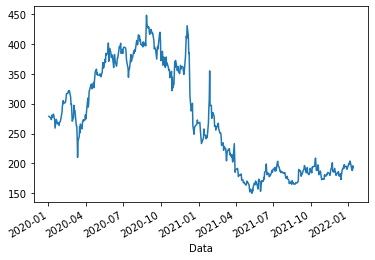

In [5]:
df.Zamkniecie.plot()

In [7]:
#Zadanie 
#narysuj wstege Bolingera

#krok 1 
#tworze linie ze srednia kroczaca, linie z odchyleniem standardowym - dla 20 dni w przeszlosci
N = 20 # zmienna kroczaca
line_ma = df.Zamkniecie.rolling(N).mean()#linia sredniej kroczacej moving average
line_std = df.Zamkniecie.rolling(N).std()

In [10]:
#krok2 
#tworze nowe zmienne z liniami zmienne zawieraja serie 
line_up = line_ma+2*line_std
line_down = line_ma-2*line_std

In [12]:
#krok 3
#Dodaje serie danych do df
df['wst górna']= line_up
df['wst dolna']= line_down
df

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,wst górna,wst dolna
Data,,,,,,,
2020-01-02,274.10,278.77,273.13,278.77,172311,NaN,NaN
2020-01-03,278.96,281.69,273.23,277.99,251004,NaN,NaN
2020-01-07,279.06,280.33,274.98,275.85,218998,NaN,NaN
2020-01-08,275.56,275.85,269.54,273.23,230932,NaN,NaN
2020-01-09,276.05,280.52,275.08,280.52,200512,NaN,NaN
...,...,...,...,...,...,...,...
2022-01-07,200.40,201.55,195.88,198.64,530654,206.731333,173.234667
2022-01-10,198.60,199.66,188.10,188.10,403340,206.757396,173.398604
2022-01-11,189.50,193.10,188.20,188.56,343540,206.534857,174.463143


In [13]:
#krok 4
#wybieram kolumny do rysowania wiec indeksuje df lista
df = df [['Zamkniecie','wst górna','wst dolna']]
df.head()

,Zamkniecie,wst górna,wst dolna
Data,,,
2020-01-02,278.77,NaN,NaN
2020-01-03,277.99,NaN,NaN
2020-01-07,275.85,NaN,NaN
2020-01-08,273.23,NaN,NaN
2020-01-09,280.52,NaN,NaN


<AxesSubplot:xlabel='Data'>

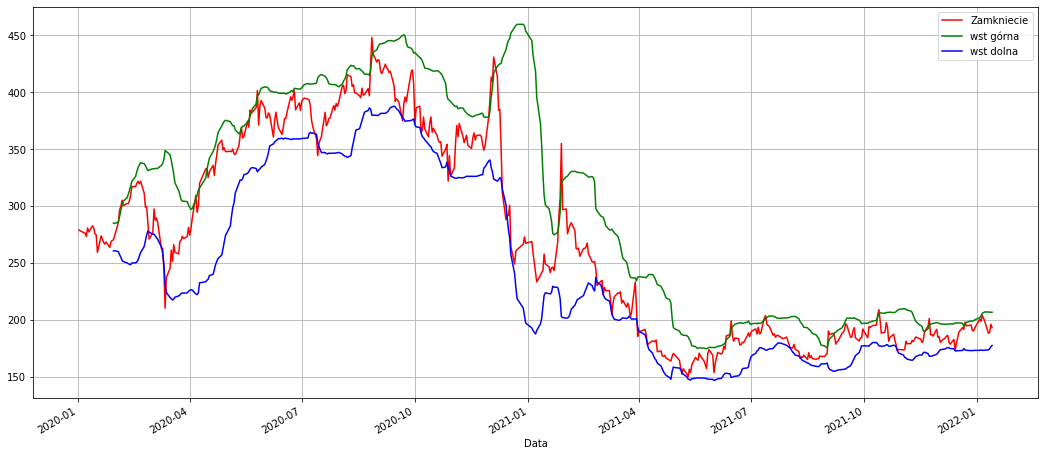

In [46]:
#krok 5
#rysuje dane
df.plot(
 figsize=(18,8), #rozciaga wykresu  
    grid=True, #dodaje siatke
    color=['red','green', 'blue'], #zmieniam kolor
    legend =True
)

In [20]:
#Wykres można podrasować przy użyciu matplotlib 

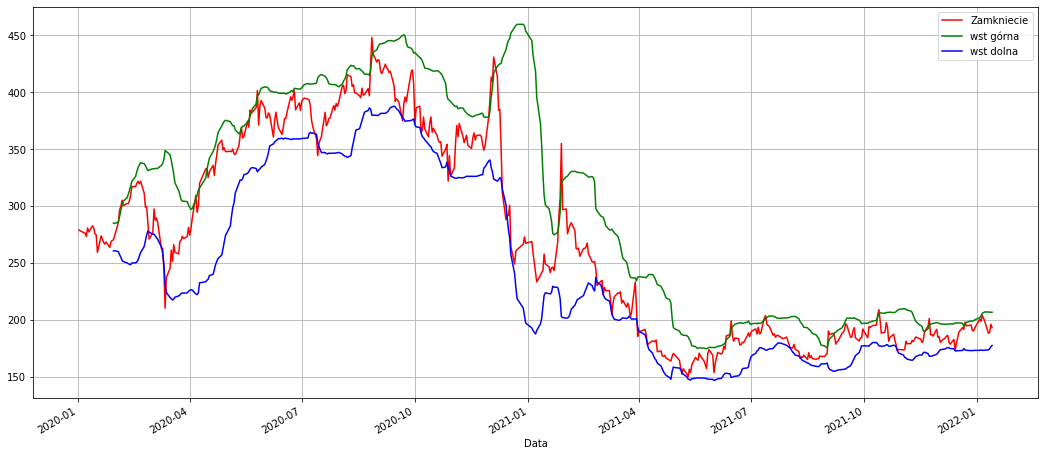

In [48]:
#Zadanie 
#zrobić cieniwanie danych wewnątrz wstegi

#krok 1 przypisuje wykres do zmiennej dzieki temu moge wygodniej uzywac dedykowanych do wykresow niskopoziomowych funkcji 
#z biblioteki matplotlib (nie jest to konieczne ale wygodniej)

canvas = df.plot(
 figsize=(18,8), #rozciaga wykresu  
    grid=True, #dodaje siatke
    color=['red','green', 'blue'], #zmieniam kolor
    legend =True # z legenda
)

In [49]:
#sprawdzam co to za obiekt jest w zmiennej - 
type(canvas) 
#jest to obiekt matplotlib

matplotlib.axes._subplots.AxesSubplot

In [57]:
import matplotlib.pyplot as plt

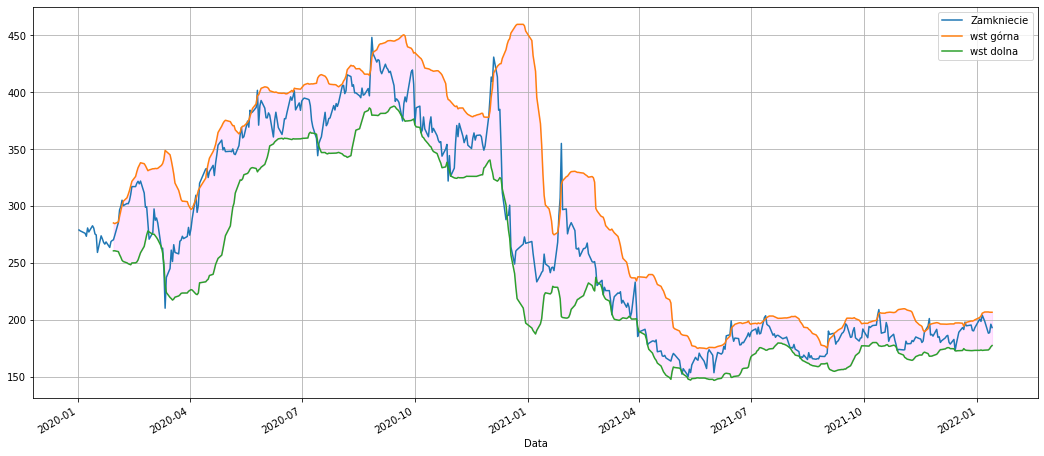

In [62]:
# krok 2 - uzywam sie dedykowanej do obiektu metody do wypelniania
canvas = df.plot(figsize=(18,8), grid=True) #ta linijka musi być 
canvas.fill_between(df.index, #podaje oś x
                    df['wst dolna'], #podaje dolny wykres
                    df['wst górna'], #podaje gorny wykres
                    color = 'magenta', # podaje kolor wypełnienia
                    alpha=0.1 # ustawiam przezroczystość
                   ); #<- wyłączam nadmiarowe dane
plt.show()#usuwa dodatkowe zapisy przed wykresem można zastąpić to średnikiem ;

In [51]:
#matplotlib jest jedną z najstarszych bibliotek pythona (ma ok 30 lat ) (z 92 rok jest python)